In [1]:
import pandas as pd

In [2]:
customer_df = pd.read_csv('../../../data/customers.csv')

In [3]:
file_loc = "data/player_stats_final.csv"

df = pd.read_csv(file_loc)
df.head()

,Player,Age,Height,Weight,Pos,MP,FG,FGA,FG%,3P,...,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OBPM,DPM,BPM
0,aaron brooks,32,73,161,PG,21.9,3.7,9.0,0.413,1.3,...,6.9,4.5,23.8,1.4,0.5,14.4,23.3,0,-2.4,-1.7
1,aaron gordon,21,81,220,SF,23.2,3.4,7.4,0.451,0.6,...,17.8,12.3,9.8,1.4,2.0,9.6,17.8,0,0.4,-0.2
2,aaron harrison,22,78,210,SG,4.2,0.2,0.9,0.217,0.1,...,14.0,8.9,6.0,2.7,0.0,12.1,13.6,0,-0.2,-6.4
3,adreian payne,25,82,237,PF,13.7,1.7,4.2,0.399,0.1,...,19.4,12.8,7.4,1.5,1.5,16.4,17.8,0,-0.8,-5.8
4,al horford,30,82,245,C,33.4,6.1,11.6,0.529,0.3,...,22.1,15.1,14.7,1.3,2.9,11.1,19.6,0,2.2,3.0


In [4]:
test_df = df.drop(['Player', 'Pos'], axis=1)

In [5]:
from sklearn.decomposition import PCA

def fit_trans_pca(components, data):
    this_pca = PCA(components)
    this_pca.fit(data)
    return this_pca.transform(data)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, metrics, datasets

def kmeans_sil_score(reduced_data, n_clusters):
    """
    performs kmeans clustering and returns labels, centroids, inertia, and silhouette score
    """
    kmeans = cluster.KMeans(n_clusters=n_clusters, random_state=42)
    kmeans = kmeans.fit(reduced_data)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia = kmeans.inertia_
    sil_score = metrics.silhouette_score(reduced_data, kmeans.labels_, metric='euclidean')

    data_dictionary = {
        "labels": labels,
        "centroids": centroids,
        "inertia" : inertia,
        "silhouette_score": sil_score
    }

    return sil_score

In [7]:
kmeans_sil_score(fit_trans_pca(2, customer_df), 2)

0.54260629274290462

In [8]:
def find_best_cluster(data,a,b):
    """
    plots and finds the best silhouette score for range(a,b)
    """
    scores = []
    for i in range(a,b):
        i_clusters = kmeans(data, i)
        sil_score_i = i_clusters['silhouette_score']
        scores.append(sil_score_i)

    plt.plot(range(a,b), scores)
    print "best silhouette score:", np.max(scores)

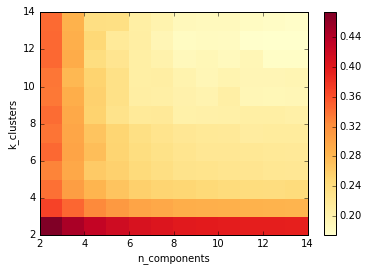

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

list_of_n_components = np.arange(2,15,1)
list_of_k_clusters = np.arange(2,15,1)

F_X = [[ kmeans_sil_score(fit_trans_pca(n, test_df), k)
            for n in list_of_n_components] 
            for k in list_of_k_clusters]

plt.pcolormesh(list_of_n_components, list_of_k_clusters, F_X, cmap='YlOrRd')
plt.colorbar() #need a colorbar to show the intensity scale
plt.xlabel('n_components')
plt.ylabel('k_clusters')
plt.figure(figsize=(20,10))